In [1]:
#importing packages

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading and understanding data
data=pd.read_csv("CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.shape

(205, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
#null check
print(100*(data.isnull().sum()/len(data.index)),2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64 2


In [7]:
#dropping car_ID as it makes no sence when we have index
data.drop('car_ID',axis=1,inplace=True)


In [8]:
#continues variables
con_var=['symboling','wheelbase','carlength','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
#catagorical veriable
cat_var=['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem','cylindernumber']

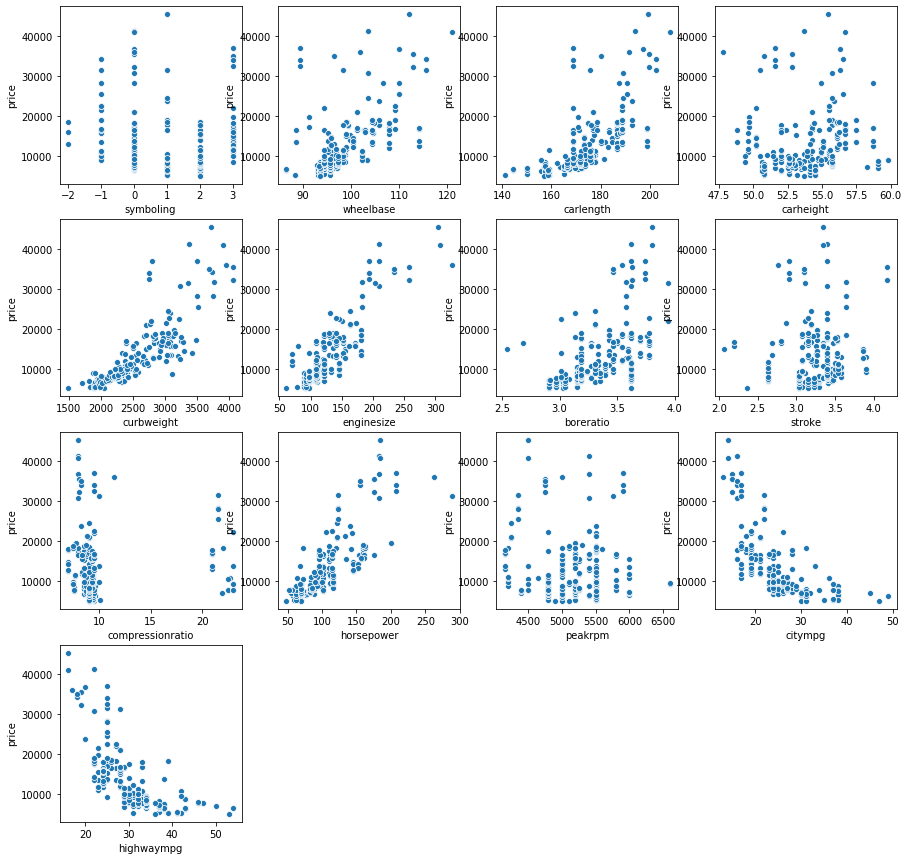

In [9]:
#pltting data
plt.figure(figsize=(15,15))
i=1;
for col in con_var:
    plt.subplot(4,4,i)
    i=i+1
    sns.scatterplot(x=col,y='price',data=data)
    

In [10]:
#wheelbase, enginesize,horsepowerhave linear relationshp with the price
#we can drop highwaympg,citympg,curbweight,carlength since these variable does not have linear relationship with price

In [11]:
data.drop(['highwaympg','citympg','curbweight','carlength'],axis=1,inplace=True)
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,64.1,...,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,64.1,...,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,65.5,...,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,66.2,...,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,66.4,...,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0


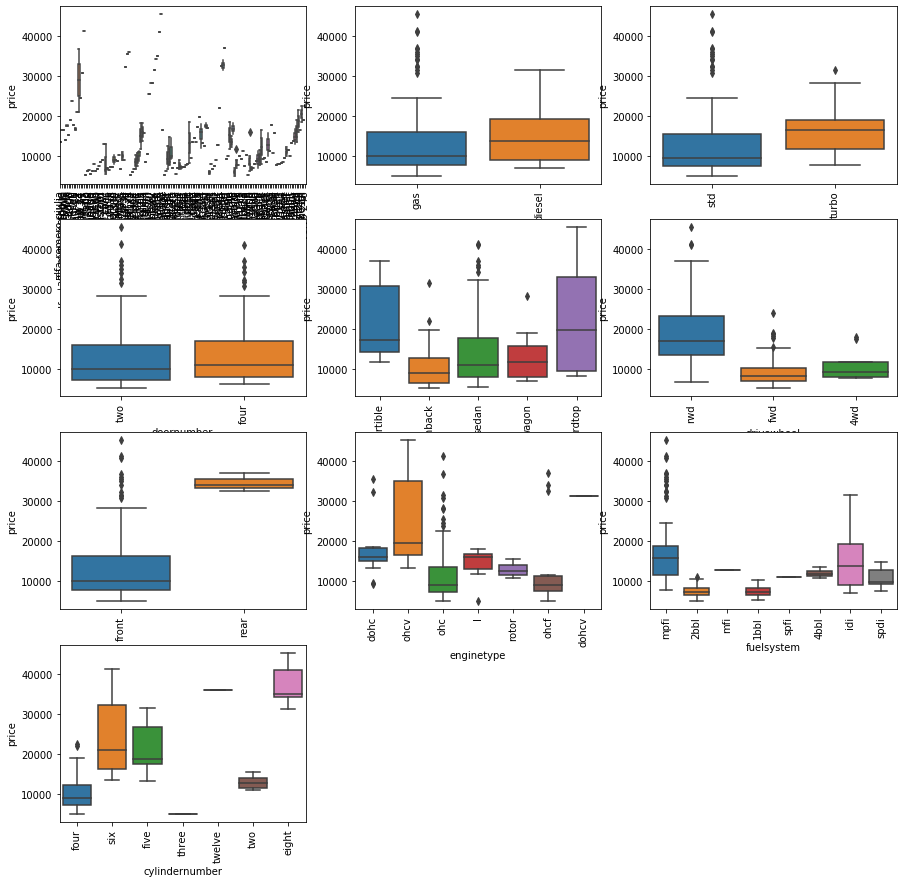

In [12]:
plt.figure(figsize=(15,15))
i=1;
for col in cat_var:
    plt.subplot(4,3,i)
    i=i+1
    sns.boxplot(x=col,y='price',data=data)
    plt.xticks(rotation=90)
    

# preparing data

In [13]:
#removing model type,keeping only company name

def splitData(var):
    str1=var.split(" ")
    return str1[0]

data['CarName']=data['CarName'].apply(lambda x:splitData(str(x)))
data['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
Nissan          1
toyouta         1
mercury         1
porcshce        1
vokswagen       1
Name: CarName, dtype: int64

In [14]:
def fun(x):
    if x=='Nissan':
        return 'nissan'
    if x=='maxda':
        return 'mazda'
    if x=='toyouta':
        return 'toyota'
    if x=='vw':
        return 'volkswagen'
    if x=='vokswagen':
        return 'volkswagen'
    if x=='porcshce':
        return 'porsche'
    else:
        return x
    
    
    
data['CarName']=data['CarName'].apply(fun)

In [15]:
data['CarName'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: CarName, dtype: int64

In [16]:
#group the data based on carName to know price range
gp=data.groupby('CarName')
print(gp['price'].mean().sort_values())

CarName
chevrolet       6007.000000
dodge           7875.444444
plymouth        7963.428571
honda           8184.692308
subaru          8541.250000
isuzu           8916.500000
mitsubishi      9239.769231
renault         9595.000000
toyota          9885.812500
volkswagen     10077.500000
nissan         10415.666667
mazda          10652.882353
saab           15223.333333
peugeot        15489.090909
alfa-romero    15498.333333
mercury        16503.000000
audi           17859.166714
volvo          18063.181818
bmw            26118.750000
porsche        31400.500000
buick          33647.000000
jaguar         34600.000000
Name: price, dtype: float64


In [17]:
#as the carNames make no sence in predicting the price of cars, only we need brand value, 
#so divide the column to highRange,lowRange and mediumRange cars based on price

high_range=['jaguar','buick','porsche','bmw','volvo','audi','mercury']
medium_range=['peugeot','alfa-romero','saab','mazda','nissan','volkswagen']
low_range=['renault','toyota','isuzu','mitsubishi','subaru','plymouth','dodge','honda','chevrolet']

In [18]:
def fun1(x):
    if x in high_range:
        return 'high_range'
    if x in medium_range:
        return 'mid_range'
    if x in low_range:
        return 'low_range'
data['budget']=data['CarName'].apply(fun1)


In [19]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,budget
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,mid_range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,mid_range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,mid_range
3,2,audi,gas,std,four,sedan,fwd,front,99.8,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,high_range
4,2,audi,gas,std,four,sedan,4wd,front,99.4,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,high_range


In [20]:
#budget map
status=pd.get_dummies(data['budget'],drop_first=True)
status.head()                                             

,low_range,mid_range
0,0,1
1,0,1
2,0,1
3,0,0
4,0,0


In [21]:
data = pd.concat([data, status], axis = 1)
data.drop('budget',axis=1,inplace=True)
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,low_range,mid_range
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,0,1
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,0,1
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,0,1
3,2,audi,gas,std,four,sedan,fwd,front,99.8,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,0,0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,0,0


In [22]:
#we can drop carName, as it does not give much information
data.drop('CarName',axis=1,inplace=True)
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,low_range,mid_range
0,3,gas,std,two,convertible,rwd,front,88.6,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,0,1
1,3,gas,std,two,convertible,rwd,front,88.6,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,0,1
2,1,gas,std,two,hatchback,rwd,front,94.5,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,0,1
3,2,gas,std,four,sedan,fwd,front,99.8,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,0,0
4,2,gas,std,four,sedan,4wd,front,99.4,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,0,0


In [23]:
data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [24]:
#fueltype map
data['fuel_gas'] = data['fueltype'].map({'gas': 1, "diesel": 0})
data.drop('fueltype',axis=1,inplace=True)
data.head()                                              

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,enginetype,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,low_range,mid_range,fuel_gas
0,3,std,two,convertible,rwd,front,88.6,64.1,48.8,dohc,...,mpfi,3.47,2.68,9.0,111,5000,13495.0,0,1,1
1,3,std,two,convertible,rwd,front,88.6,64.1,48.8,dohc,...,mpfi,3.47,2.68,9.0,111,5000,16500.0,0,1,1
2,1,std,two,hatchback,rwd,front,94.5,65.5,52.4,ohcv,...,mpfi,2.68,3.47,9.0,154,5000,16500.0,0,1,1
3,2,std,four,sedan,fwd,front,99.8,66.2,54.3,ohc,...,mpfi,3.19,3.40,10.0,102,5500,13950.0,0,0,1
4,2,std,four,sedan,4wd,front,99.4,66.4,54.3,ohc,...,mpfi,3.19,3.40,8.0,115,5500,17450.0,0,0,1


In [25]:
data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [26]:
#aspiration map
data['asp_turbo'] = data['aspiration'].map({'turbo': 1, "std": 0})
data.drop('aspiration',axis=1,inplace=True)
data.head()                                              

,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,enginetype,cylindernumber,...,boreratio,stroke,compressionratio,horsepower,peakrpm,price,low_range,mid_range,fuel_gas,asp_turbo
0,3,two,convertible,rwd,front,88.6,64.1,48.8,dohc,four,...,3.47,2.68,9.0,111,5000,13495.0,0,1,1,0
1,3,two,convertible,rwd,front,88.6,64.1,48.8,dohc,four,...,3.47,2.68,9.0,111,5000,16500.0,0,1,1,0
2,1,two,hatchback,rwd,front,94.5,65.5,52.4,ohcv,six,...,2.68,3.47,9.0,154,5000,16500.0,0,1,1,0
3,2,four,sedan,fwd,front,99.8,66.2,54.3,ohc,four,...,3.19,3.40,10.0,102,5500,13950.0,0,0,1,0
4,2,four,sedan,4wd,front,99.4,66.4,54.3,ohc,five,...,3.19,3.40,8.0,115,5500,17450.0,0,0,1,0


In [27]:
data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [28]:
#doornumber map
data['door_four'] = data['doornumber'].map({'four': 1, "two": 0})
data.drop('doornumber',axis=1,inplace=True)
data.head()                                              

,symboling,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,enginetype,cylindernumber,enginesize,...,stroke,compressionratio,horsepower,peakrpm,price,low_range,mid_range,fuel_gas,asp_turbo,door_four
0,3,convertible,rwd,front,88.6,64.1,48.8,dohc,four,130,...,2.68,9.0,111,5000,13495.0,0,1,1,0,0
1,3,convertible,rwd,front,88.6,64.1,48.8,dohc,four,130,...,2.68,9.0,111,5000,16500.0,0,1,1,0,0
2,1,hatchback,rwd,front,94.5,65.5,52.4,ohcv,six,152,...,3.47,9.0,154,5000,16500.0,0,1,1,0,0
3,2,sedan,fwd,front,99.8,66.2,54.3,ohc,four,109,...,3.40,10.0,102,5500,13950.0,0,0,1,0,1
4,2,sedan,4wd,front,99.4,66.4,54.3,ohc,five,136,...,3.40,8.0,115,5500,17450.0,0,0,1,0,1


In [29]:
#carbody map
status_carbody=pd.get_dummies(data['carbody'],drop_first=True)
status_carbody.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [30]:
data = pd.concat([data, status_carbody], axis = 1)
data.drop('carbody',axis=1,inplace=True)
data.head()

,symboling,drivewheel,enginelocation,wheelbase,carwidth,carheight,enginetype,cylindernumber,enginesize,fuelsystem,...,price,low_range,mid_range,fuel_gas,asp_turbo,door_four,hardtop,hatchback,sedan,wagon
0,3,rwd,front,88.6,64.1,48.8,dohc,four,130,mpfi,...,13495.0,0,1,1,0,0,0,0,0,0
1,3,rwd,front,88.6,64.1,48.8,dohc,four,130,mpfi,...,16500.0,0,1,1,0,0,0,0,0,0
2,1,rwd,front,94.5,65.5,52.4,ohcv,six,152,mpfi,...,16500.0,0,1,1,0,0,0,1,0,0
3,2,fwd,front,99.8,66.2,54.3,ohc,four,109,mpfi,...,13950.0,0,0,1,0,1,0,0,1,0
4,2,4wd,front,99.4,66.4,54.3,ohc,five,136,mpfi,...,17450.0,0,0,1,0,1,0,0,1,0


In [31]:
data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [32]:
#drivewheel map
data['fwd_drive']=data['drivewheel'].map({'fwd': 1,'4wd': 1,'rwd':0})
data.drop('drivewheel',axis=1,inplace=True)
data.head()

,symboling,enginelocation,wheelbase,carwidth,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,...,low_range,mid_range,fuel_gas,asp_turbo,door_four,hardtop,hatchback,sedan,wagon,fwd_drive
0,3,front,88.6,64.1,48.8,dohc,four,130,mpfi,3.47,...,0,1,1,0,0,0,0,0,0,0
1,3,front,88.6,64.1,48.8,dohc,four,130,mpfi,3.47,...,0,1,1,0,0,0,0,0,0,0
2,1,front,94.5,65.5,52.4,ohcv,six,152,mpfi,2.68,...,0,1,1,0,0,0,1,0,0,0
3,2,front,99.8,66.2,54.3,ohc,four,109,mpfi,3.19,...,0,0,1,0,1,0,0,1,0,1
4,2,front,99.4,66.4,54.3,ohc,five,136,mpfi,3.19,...,0,0,1,0,1,0,0,1,0,1


In [33]:
data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [34]:
#enginelocation map
data['front_engine']=data['enginelocation'].map({'front': 1,'rear': 0})
data.drop('enginelocation',axis=1,inplace=True)
data.head()

,symboling,wheelbase,carwidth,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,...,mid_range,fuel_gas,asp_turbo,door_four,hardtop,hatchback,sedan,wagon,fwd_drive,front_engine
0,3,88.6,64.1,48.8,dohc,four,130,mpfi,3.47,2.68,...,1,1,0,0,0,0,0,0,0,1
1,3,88.6,64.1,48.8,dohc,four,130,mpfi,3.47,2.68,...,1,1,0,0,0,0,0,0,0,1
2,1,94.5,65.5,52.4,ohcv,six,152,mpfi,2.68,3.47,...,1,1,0,0,0,1,0,0,0,1
3,2,99.8,66.2,54.3,ohc,four,109,mpfi,3.19,3.40,...,0,1,0,1,0,0,1,0,1,1
4,2,99.4,66.4,54.3,ohc,five,136,mpfi,3.19,3.40,...,0,1,0,1,0,0,1,0,1,1


In [35]:
#enginetype map
status_engine=pd.get_dummies(data['enginetype'],drop_first=True)
status_engine.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [36]:
data = pd.concat([data, status_engine], axis = 1)
data.drop('enginetype',axis=1,inplace=True)
data.head()

,symboling,wheelbase,carwidth,carheight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,...,sedan,wagon,fwd_drive,front_engine,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,88.6,64.1,48.8,four,130,mpfi,3.47,2.68,9.0,...,0,0,0,1,0,0,0,0,0,0
1,3,88.6,64.1,48.8,four,130,mpfi,3.47,2.68,9.0,...,0,0,0,1,0,0,0,0,0,0
2,1,94.5,65.5,52.4,six,152,mpfi,2.68,3.47,9.0,...,0,0,0,1,0,0,0,0,1,0
3,2,99.8,66.2,54.3,four,109,mpfi,3.19,3.40,10.0,...,1,0,1,1,0,0,1,0,0,0
4,2,99.4,66.4,54.3,five,136,mpfi,3.19,3.40,8.0,...,1,0,1,1,0,0,1,0,0,0


In [37]:
#fuelsystem map
status_fuelSy=pd.get_dummies(data['fuelsystem'],drop_first=True)
status_fuelSy.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [38]:
data = pd.concat([data, status_fuelSy], axis = 1)
data.drop('fuelsystem',axis=1,inplace=True)
data.head()

,symboling,wheelbase,carwidth,carheight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,64.1,48.8,four,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,64.1,48.8,four,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,65.5,52.4,six,152,2.68,3.47,9.0,154,...,0,1,0,0,0,0,0,1,0,0
3,2,99.8,66.2,54.3,four,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,66.4,54.3,five,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [39]:
data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

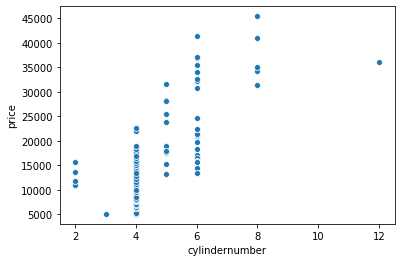

In [40]:
data['cylindernumber']=data['cylindernumber'].map({'two': 2,'three': 3,'four': 4,'five':5,'six':6,'eight':8,'twelve':12})
sns.scatterplot(x='cylindernumber',y='price',data=data)


#looks like as the number of cylinder increases price is also increasing, it has linear relationship

In [41]:
data.describe()

,symboling,wheelbase,carwidth,carheight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,65.907805,53.724878,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,...,0.073171,0.063415,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,6.021776,2.145204,2.443522,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,...,0.261054,0.244304,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,86.600000,60.300000,47.800000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,94.500000,64.100000,52.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,97.000000,65.500000,54.100000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,102.400000,66.900000,55.500000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,120.900000,72.300000,59.800000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting the Data into Training and Testing Sets

In [42]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

,symboling,wheelbase,carwidth,carheight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,1,93.7,63.8,50.8,4,98,2.97,3.23,9.4,68,...,0,0,0,1,0,0,0,0,0,0
125,3,94.5,68.3,50.2,4,151,3.94,3.11,9.5,143,...,0,0,0,0,0,0,0,1,0,0
166,1,94.5,64.0,52.6,4,98,3.24,3.08,9.4,112,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,64.1,48.8,4,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
199,-1,104.3,67.2,57.5,4,130,3.62,3.15,7.5,162,...,0,0,0,0,0,0,0,1,0,0


# Rescaling the Features

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler=MinMaxScaler()
lst=['symboling','wheelbase','carwidth','carheight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','price']


In [45]:
df_train[lst]=scaler.fit_transform(df_train[lst])
df_train.describe()

,symboling,wheelbase,carwidth,carheight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.411141,0.461655,0.509004,0.240559,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.205581,0.184517,0.215378,0.115818,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,0.272414,0.304167,0.353982,0.200000,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,0.341379,0.425000,0.522124,0.200000,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,0.503448,0.550000,0.668142,0.200000,0.301887,0.682540,0.611111,0.150000,0.283333,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


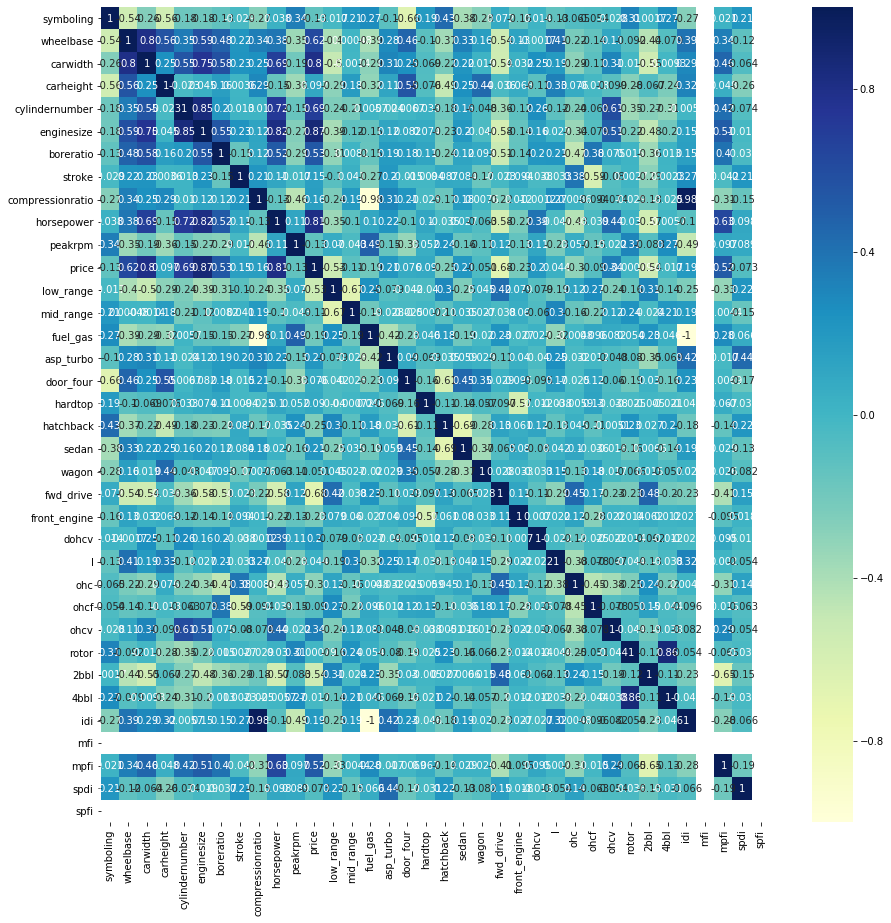

In [46]:
train_corr=df_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(train_corr,annot=True,cmap='YlGnBu')

In [47]:
c=train_corr.get('price')
c.sort_values(ascending=True)

fwd_drive          -0.677169
2bbl               -0.537919
low_range          -0.526616
ohc                -0.297108
hatchback          -0.252484
front_engine       -0.226217
fuel_gas           -0.191150
symboling          -0.129859
peakrpm            -0.127431
mid_range          -0.106263
ohcf               -0.089985
spdi               -0.073240
wagon              -0.051173
4bbl               -0.017148
rotor              -0.000793
l                   0.044246
door_four           0.075936
hardtop             0.089735
carheight           0.096631
stroke              0.152820
compressionratio    0.160847
idi                 0.191150
dohcv               0.197875
sedan               0.205018
asp_turbo           0.206540
ohcv                0.339468
mpfi                0.519993
boreratio           0.533591
wheelbase           0.622591
cylindernumber      0.692424
carwidth            0.799380
horsepower          0.806183
enginesize          0.867915
price               1.000000
mfi           

# Dividing into X and Y sets for the model building

In [48]:
y_train = df_train.pop('price')
X_train = df_train

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
rfe=RFE(lm,20)
rfe=rfe.fit(X_train,y_train)
rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=20, step=1, verbose=0)

In [52]:
col=X_train.columns[rfe.support_]
col

Index(['carwidth', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'low_range', 'mid_range', 'fuel_gas',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'front_engine', 'dohcv',
       'ohcv', 'rotor', 'idi', 'spdi'],
      dtype='object')

In [53]:
import statsmodels.api as sm
x_1=X_train[col]
x_train_sm_1=sm.add_constant(x_1)
lr_1=sm.OLS(y_train,x_train_sm_1)
lr_model_1=lr_1.fit()
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     88.61
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.39e-62
Time:                        21:00:41   Log-Likelihood:                 209.07
No. Observations:                 143   AIC:                            -378.1
Df Residuals:                     123   BIC:                            -318.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5085      0.089      5.695      0.000       0.332       0.685
carwidth             0.1912      0.057      3.346      0.001       0.078       0.304
cylindernumber      -0.7799      0.230     -3.390      0.001      -1.235      -0.324
enginesize           1.3232      0.203      6.516      0.000       0.921       1.725
boreratio           -0.3252      0.071     -4.553      0.000      -0.467      -0.184
stroke              -0.2922      0.067     -4.389      0.000      -0.424      -0.160
compressionratio    -0.2297      0.171     -1.341      0.183      -0.569       0.109
horsepower           0.3000      0.087      3.464      0.001       0.129       0.471
low_range           -0.1694      0.021     -8.138      0.000      -0.211      -0.128
mid_range           -0.1551      0.020     -7.812      0.000      -0.194      -0.116
fuel_gas             0.1264      0.055      2.309      0.023       0.018       0.235
hardtop             -0.0476      0.055     -0.860      0.391      -0.157       0.062
hatchback           -0.0680      0.035     -1.922      0.057      -0.138       0.002
sedan               -0.0537      0.034     -1.574      0.118      -0.121       0.014
wagon               -0.0536      0.036     -1.488      0.139      -0.125       0.018
front_engine        -0.1760      0.081     -2.176      0.031      -0.336      -0.016
dohcv                0.1070      0.091      1.173      0.243      -0.074       0.288
ohcv                -0.0684      0.032     -2.167      0.032      -0.131      -0.006
rotor                0.1217      0.045      2.720      0.007       0.033       0.210
idi                  0.3821      0.105      3.631      0.000       0.174       0.590
spdi                -0.0348      0.031     -1.107      0.271      -0.097       0.027
==============================================================================
Omnibus:                       51.216   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.392
Skew:                           1.123   Prob(JB):                     9.60e-61
Kurtosis:                       9.430   Cond. No.                     2.96e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.34e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# checking VIF

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
vif = pd.DataFrame()
vif['Features'] = x_1.columns
vif['VIF'] = [variance_inflation_factor(x_1.values, i) for i in range(x_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,fuel_gas,386.07
18,idi,124.76
5,compressionratio,64.15
2,enginesize,38.28
1,cylindernumber,27.58
12,sedan,11.37
11,hatchback,11.03
3,boreratio,8.50
6,horsepower,7.98
13,wagon,5.85


In [56]:
#removing features with high VIF,since it indicates high multicollinearity
#remving fuel_gas

x_2=x_1.drop('fuel_gas',axis=1)

In [57]:
x_train_sm_2=sm.add_constant(x_2)
lr_2=sm.OLS(y_train,x_train_sm_2)
lr_model_2=lr_2.fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     88.61
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.39e-62
Time:                        21:00:41   Log-Likelihood:                 209.07
No. Observations:                 143   AIC:                            -378.1
Df Residuals:                     123   BIC:                            -318.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6348      0.104      6.092      0.000       0.429       0.841
carwidth             0.1912      0.057      3.346      0.001       0.078       0.304
cylindernumber      -0.7799      0.230     -3.390      0.001      -1.235      -0.324
enginesize           1.3232      0.203      6.516      0.000       0.921       1.725
boreratio           -0.3252      0.071     -4.553      0.000      -0.467      -0.184
stroke              -0.2922      0.067     -4.389      0.000      -0.424      -0.160
compressionratio    -0.2297      0.171     -1.341      0.183      -0.569       0.109
horsepower           0.3000      0.087      3.464      0.001       0.129       0.471
low_range           -0.1694      0.021     -8.138      0.000      -0.211      -0.128
mid_range           -0.1551      0.020     -7.812      0.000      -0.194      -0.116
hardtop             -0.0476      0.055     -0.860      0.391      -0.157       0.062
hatchback           -0.0680      0.035     -1.922      0.057      -0.138       0.002
sedan               -0.0537      0.034     -1.574      0.118      -0.121       0.014
wagon               -0.0536      0.036     -1.488      0.139      -0.125       0.018
front_engine        -0.1760      0.081     -2.176      0.031      -0.336      -0.016
dohcv                0.1070      0.091      1.173      0.243      -0.074       0.288
ohcv                -0.0684      0.032     -2.167      0.032      -0.131      -0.006
rotor                0.1217      0.045      2.720      0.007       0.033       0.210
idi                  0.2557      0.142      1.800      0.074      -0.025       0.537
spdi                -0.0348      0.031     -1.107      0.271      -0.097       0.027
==============================================================================
Omnibus:                       51.216   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.392
Skew:                           1.123   Prob(JB):                     9.60e-61
Kurtosis:                       9.430   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
vif['Features'] = x_2.columns
vif['VIF'] = [variance_inflation_factor(x_2.values, i) for i in range(x_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,front_engine,125.76
1,cylindernumber,116.16
2,enginesize,106.78
5,compressionratio,103.70
17,idi,70.36
4,stroke,44.99
3,boreratio,44.55
0,carwidth,31.41
6,horsepower,22.38
11,sedan,21.30


In [59]:
#dropping front_engine as it is having high VIF value
x_3=x_2.drop('front_engine',axis=1)


In [60]:
x_train_sm_3=sm.add_constant(x_3)
lr_3=sm.OLS(y_train,x_train_sm_3)
lr_model_3=lr_3.fit()
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     90.54
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.46e-62
Time:                        21:00:42   Log-Likelihood:                 206.37
No. Observations:                 143   AIC:                            -374.7
Df Residuals:                     124   BIC:                            -318.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4737      0.074      6.366      0.000       0.326       0.621
carwidth             0.1644      0.057      2.903      0.004       0.052       0.276
cylindernumber      -0.8032      0.233     -3.443      0.001      -1.265      -0.342
enginesize           1.3330      0.206      6.469      0.000       0.925       1.741
boreratio           -0.3310      0.072     -4.569      0.000      -0.474      -0.188
stroke              -0.3070      0.067     -4.566      0.000      -0.440      -0.174
compressionratio    -0.2131      0.174     -1.227      0.222      -0.557       0.131
horsepower           0.3483      0.085      4.100      0.000       0.180       0.516
low_range           -0.1757      0.021     -8.402      0.000      -0.217      -0.134
mid_range           -0.1604      0.020     -8.019      0.000      -0.200      -0.121
hardtop              0.0056      0.050      0.110      0.912      -0.094       0.105
hatchback           -0.0639      0.036     -1.780      0.077      -0.135       0.007
sedan               -0.0504      0.035     -1.456      0.148      -0.119       0.018
wagon               -0.0494      0.037     -1.352      0.179      -0.122       0.023
dohcv                0.0848      0.092      0.922      0.359      -0.097       0.267
ohcv                -0.0749      0.032     -2.349      0.020      -0.138      -0.012
rotor                0.1156      0.045      2.552      0.012       0.026       0.205
idi                  0.2500      0.144      1.735      0.085      -0.035       0.535
spdi                -0.0361      0.032     -1.133      0.260      -0.099       0.027
==============================================================================
Omnibus:                       39.549   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.606
Skew:                           0.882   Prob(JB):                     5.45e-38
Kurtosis:                       8.068   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = x_3.columns
vif['VIF'] = [variance_inflation_factor(x_3.values, i) for i in range(x_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,compressionratio,102.95
2,enginesize,77.01
1,cylindernumber,74.60
16,idi,69.45
0,carwidth,29.57
4,stroke,28.26
3,boreratio,27.74
6,horsepower,21.61
11,sedan,21.20
10,hatchback,16.30


In [62]:
#removing compressionratio as it is having high vif

In [63]:
x_4=x_3.drop('compressionratio',axis=1)

In [64]:
x_train_sm_4=sm.add_constant(x_4)
lr_4=sm.OLS(y_train,x_train_sm_4)
lr_model_4=lr_4.fit()
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     95.39
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.19e-63
Time:                        21:00:42   Log-Likelihood:                 205.50
No. Observations:                 143   AIC:                            -375.0
Df Residuals:                     125   BIC:                            -321.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4589      0.074      6.237      0.000       0.313       0.605
carwidth           0.1771      0.056      3.173      0.002       0.067       0.288
cylindernumber    -0.8864      0.224     -3.963      0.000      -1.329      -0.444
enginesize         1.3545      0.206      6.584      0.000       0.947       1.762
boreratio         -0.3390      0.072     -4.688      0.000      -0.482      -0.196
stroke            -0.3054      0.067     -4.534      0.000      -0.439      -0.172
horsepower         0.3766      0.082      4.596      0.000       0.214       0.539
low_range         -0.1770      0.021     -8.456      0.000      -0.218      -0.136
mid_range         -0.1619      0.020     -8.088      0.000      -0.201      -0.122
hardtop           -0.0055      0.050     -0.110      0.912      -0.104       0.093
hatchback         -0.0681      0.036     -1.903      0.059      -0.139       0.003
sedan             -0.0536      0.035     -1.551      0.123      -0.122       0.015
wagon             -0.0508      0.037     -1.390      0.167      -0.123       0.022
dohcv              0.0685      0.091      0.751      0.454      -0.112       0.249
ohcv              -0.0709      0.032     -2.229      0.028      -0.134      -0.008
rotor              0.0935      0.042      2.245      0.027       0.011       0.176
idi                0.0754      0.023      3.347      0.001       0.031       0.120
spdi              -0.0203      0.029     -0.694      0.489      -0.078       0.038
==============================================================================
Omnibus:                       42.077   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.850
Skew:                           0.906   Prob(JB):                     2.00e-45
Kurtosis:                       8.591   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = x_4.columns
vif['VIF'] = [variance_inflation_factor(x_4.values, i) for i in range(x_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,72.11
1,cylindernumber,49.86
0,carwidth,28.76
4,stroke,27.79
3,boreratio,25.19
10,sedan,20.98
5,horsepower,19.97
9,hatchback,16.05
6,low_range,7.10
11,wagon,6.56


In [66]:
#removing enginesize as it is having high vif
x_5=x_4.drop('enginesize',axis=1)

In [67]:
x_train_sm_5=sm.add_constant(x_5)
lr_5=sm.OLS(y_train,x_train_sm_5)
lr_model_5=lr_5.fit()
lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     73.83
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.87e-56
Time:                        21:00:43   Log-Likelihood:                 184.22
No. Observations:                 143   AIC:                            -334.4
Df Residuals:                     126   BIC:                            -284.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1338      0.063      2.122      0.036       0.009       0.259
carwidth           0.1908      0.064      2.960      0.004       0.063       0.318
cylindernumber     0.3870      0.130      2.981      0.003       0.130       0.644
boreratio          0.0539      0.047      1.143      0.255      -0.039       0.147
stroke             0.0416      0.049      0.857      0.393      -0.054       0.138
horsepower         0.5283      0.091      5.814      0.000       0.348       0.708
low_range         -0.1877      0.024     -7.782      0.000      -0.235      -0.140
mid_range         -0.1727      0.023     -7.491      0.000      -0.218      -0.127
hardtop           -0.0764      0.056     -1.362      0.176      -0.187       0.035
hatchback         -0.1367      0.040     -3.454      0.001      -0.215      -0.058
sedan             -0.1238      0.038     -3.255      0.001      -0.199      -0.049
wagon             -0.1189      0.041     -2.934      0.004      -0.199      -0.039
dohcv             -0.2956      0.084     -3.526      0.001      -0.462      -0.130
ohcv              -0.0679      0.037     -1.848      0.067      -0.141       0.005
rotor              0.1224      0.048      2.558      0.012       0.028       0.217
idi                0.0948      0.026      3.675      0.000       0.044       0.146
spdi              -0.0368      0.034     -1.094      0.276      -0.103       0.030
==============================================================================
Omnibus:                       44.043   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.365
Skew:                           0.979   Prob(JB):                     1.54e-45
Kurtosis:                       8.550   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = x_5.columns
vif['VIF'] = [variance_inflation_factor(x_5.values, i) for i in range(x_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,28.71
1,cylindernumber,22.82
3,stroke,18.00
4,horsepower,16.35
9,sedan,14.34
2,boreratio,14.32
8,hatchback,10.93
5,low_range,6.04
10,wagon,4.74
6,mid_range,3.56


In [69]:
#removing carwidth
x_6=x_5.drop('carwidth',axis=1)

In [70]:
x_train_sm_6=sm.add_constant(x_6)
lr_6=sm.OLS(y_train,x_train_sm_6)
lr_model_6=lr_6.fit()
lr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     73.66
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.40e-55
Time:                        21:00:43   Log-Likelihood:                 179.41
No. Observations:                 143   AIC:                            -326.8
Df Residuals:                     127   BIC:                            -279.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1534      0.065      2.375      0.019       0.026       0.281
cylindernumber     0.4319      0.133      3.252      0.001       0.169       0.695
boreratio          0.1078      0.045      2.404      0.018       0.019       0.197
stroke             0.0865      0.047      1.823      0.071      -0.007       0.180
horsepower         0.5835      0.092      6.368      0.000       0.402       0.765
low_range         -0.2114      0.023     -9.016      0.000      -0.258      -0.165
mid_range         -0.1900      0.023     -8.267      0.000      -0.235      -0.144
hardtop           -0.1006      0.057     -1.760      0.081      -0.214       0.013
hatchback         -0.1292      0.041     -3.176      0.002      -0.210      -0.049
sedan             -0.1137      0.039     -2.915      0.004      -0.191      -0.037
wagon             -0.1043      0.041     -2.517      0.013      -0.186      -0.022
dohcv             -0.2888      0.086     -3.344      0.001      -0.460      -0.118
ohcv              -0.0598      0.038     -1.583      0.116      -0.134       0.015
rotor              0.1323      0.049      2.690      0.008       0.035       0.230
idi                0.1151      0.026      4.490      0.000       0.064       0.166
spdi              -0.0453      0.035     -1.311      0.192      -0.114       0.023
==============================================================================
Omnibus:                       33.930   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.207
Skew:                           0.805   Prob(JB):                     1.30e-26
Kurtosis:                       7.173   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
vif = pd.DataFrame()
vif['Features'] = x_6.columns
vif['VIF'] = [variance_inflation_factor(x_6.values, i) for i in range(x_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,cylindernumber,21.74
3,horsepower,15.82
2,stroke,15.41
8,sedan,13.94
1,boreratio,10.82
7,hatchback,10.71
4,low_range,5.42
9,wagon,4.55
5,mid_range,3.36
11,ohcv,2.23


In [72]:
#removing cylindernumber
x_7=x_6.drop('cylindernumber',axis=1)

In [73]:
x_train_sm_7=sm.add_constant(x_7)
lr_7=sm.OLS(y_train,x_train_sm_7)
lr_model_7=lr_7.fit()
lr_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     72.73
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.64e-54
Time:                        21:00:43   Log-Likelihood:                 173.69
No. Observations:                 143   AIC:                            -317.4
Df Residuals:                     128   BIC:                            -272.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2778      0.054      5.149      0.000       0.171       0.385
boreratio      0.0442      0.042      1.056      0.293      -0.039       0.127
stroke         0.0609      0.049      1.256      0.211      -0.035       0.157
horsepower     0.7788      0.072     10.853      0.000       0.637       0.921
low_range     -0.2283      0.024     -9.632      0.000      -0.275      -0.181
mid_range     -0.2178      0.022     -9.856      0.000      -0.262      -0.174
hardtop       -0.1072      0.059     -1.809      0.073      -0.224       0.010
hatchback     -0.1397      0.042     -3.323      0.001      -0.223      -0.056
sedan         -0.1146      0.040     -2.832      0.005      -0.195      -0.035
wagon         -0.1098      0.043     -2.557      0.012      -0.195      -0.025
dohcv         -0.2633      0.089     -2.954      0.004      -0.440      -0.087
ohcv           0.0057      0.033      0.173      0.863      -0.060       0.071
rotor          0.0428      0.042      1.014      0.313      -0.041       0.126
idi            0.1354      0.026      5.253      0.000       0.084       0.186
spdi          -0.0697      0.035     -1.995      0.048      -0.139      -0.001
==============================================================================
Omnibus:                       31.314   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.508
Skew:                           0.654   Prob(JB):                     1.68e-29
Kurtosis:                       7.531   Cond. No.                         24.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
vif = pd.DataFrame()
vif['Features'] = x_7.columns
vif['VIF'] = [variance_inflation_factor(x_7.values, i) for i in range(x_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,stroke,15.22
7,sedan,11.16
0,boreratio,10.54
2,horsepower,9.96
6,hatchback,9.37
3,low_range,5.40
8,wagon,3.94
4,mid_range,3.34
10,ohcv,1.70
5,hardtop,1.54


In [75]:
#removing stroke
x_8=x_7.drop('stroke',axis=1)

In [76]:
x_train_sm_8=sm.add_constant(x_8)
lr_8=sm.OLS(y_train,x_train_sm_8)
lr_model_8=lr_8.fit()
lr_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     77.85
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.84e-54
Time:                        21:00:44   Log-Likelihood:                 172.81
No. Observations:                 143   AIC:                            -317.6
Df Residuals:                     129   BIC:                            -276.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3052      0.049      6.170      0.000       0.207       0.403
boreratio      0.0261      0.039      0.663      0.508      -0.052       0.104
horsepower     0.8068      0.068     11.804      0.000       0.672       0.942
low_range     -0.2295      0.024     -9.667      0.000      -0.276      -0.182
mid_range     -0.2164      0.022     -9.782      0.000      -0.260      -0.173
hardtop       -0.1005      0.059     -1.699      0.092      -0.217       0.017
hatchback     -0.1312      0.042     -3.155      0.002      -0.213      -0.049
sedan         -0.1068      0.040     -2.666      0.009      -0.186      -0.028
wagon         -0.1049      0.043     -2.448      0.016      -0.190      -0.020
dohcv         -0.2809      0.088     -3.183      0.002      -0.455      -0.106
ohcv          -0.0037      0.032     -0.116      0.908      -0.068       0.060
rotor          0.0404      0.042      0.955      0.341      -0.043       0.124
idi            0.1464      0.024      6.029      0.000       0.098       0.194
spdi          -0.0620      0.034     -1.799      0.074      -0.130       0.006
==============================================================================
Omnibus:                       30.930   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.732
Skew:                           0.655   Prob(JB):                     3.02e-28
Kurtosis:                       7.422   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = x_8.columns
vif['VIF'] = [variance_inflation_factor(x_8.values, i) for i in range(x_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,boreratio,10.05
1,horsepower,8.45
6,sedan,7.19
5,hatchback,6.36
2,low_range,5.27
7,wagon,3.14
3,mid_range,3.10
9,ohcv,1.62
4,hardtop,1.40
8,dohcv,1.32


In [78]:
#removing boreratio as it has value and vif
x_9=x_8.drop('boreratio',axis=1)

In [79]:
x_train_sm_9=sm.add_constant(x_9)
lr_9=sm.OLS(y_train,x_train_sm_9)
lr_model_9=lr_9.fit()
lr_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     84.67
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.42e-55
Time:                        21:00:44   Log-Likelihood:                 172.57
No. Observations:                 143   AIC:                            -319.1
Df Residuals:                     130   BIC:                            -280.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3154      0.047      6.724      0.000       0.223       0.408
horsepower     0.8268      0.061     13.509      0.000       0.706       0.948
low_range     -0.2298      0.024     -9.707      0.000      -0.277      -0.183
mid_range     -0.2164      0.022     -9.803      0.000      -0.260      -0.173
hardtop       -0.1004      0.059     -1.702      0.091      -0.217       0.016
hatchback     -0.1341      0.041     -3.249      0.001      -0.216      -0.052
sedan         -0.1081      0.040     -2.706      0.008      -0.187      -0.029
wagon         -0.1047      0.043     -2.450      0.016      -0.189      -0.020
dohcv         -0.2821      0.088     -3.204      0.002      -0.456      -0.108
ohcv          -0.0080      0.032     -0.254      0.800      -0.071       0.054
rotor          0.0414      0.042      0.982      0.328      -0.042       0.125
idi            0.1495      0.024      6.286      0.000       0.102       0.197
spdi          -0.0632      0.034     -1.841      0.068      -0.131       0.005
==============================================================================
Omnibus:                       30.958   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.402
Skew:                           0.664   Prob(JB):                     9.69e-28
Kurtosis:                       7.372   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
vif = pd.DataFrame()
vif['Features'] = x_9.columns
vif['VIF'] = [variance_inflation_factor(x_9.values, i) for i in range(x_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,sedan,6.37
4,hatchback,6.09
0,horsepower,5.68
1,low_range,5.18
2,mid_range,2.99
6,wagon,2.82
8,ohcv,1.55
3,hardtop,1.36
7,dohcv,1.31
10,idi,1.27


In [81]:
#removing ohcv as it has high p value
x_10=x_9.drop('ohcv',axis=1)

In [82]:
x_train_sm_10=sm.add_constant(x_10)
lr_10=sm.OLS(y_train,x_train_sm_10)
lr_model_10=lr_10.fit()
lr_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     93.02
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.53e-56
Time:                        21:00:44   Log-Likelihood:                 172.53
No. Observations:                 143   AIC:                            -321.1
Df Residuals:                     131   BIC:                            -285.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3163      0.047      6.787      0.000       0.224       0.409
horsepower     0.8194      0.054     15.265      0.000       0.713       0.926
low_range     -0.2302      0.024     -9.779      0.000      -0.277      -0.184
mid_range     -0.2174      0.022    -10.074      0.000      -0.260      -0.175
hardtop       -0.0983      0.058     -1.689      0.094      -0.213       0.017
hatchback     -0.1337      0.041     -3.254      0.001      -0.215      -0.052
sedan         -0.1073      0.040     -2.704      0.008      -0.186      -0.029
wagon         -0.1040      0.043     -2.447      0.016      -0.188      -0.020
dohcv         -0.2760      0.084     -3.270      0.001      -0.443      -0.109
rotor          0.0431      0.042      1.039      0.301      -0.039       0.125
idi            0.1498      0.024      6.333      0.000       0.103       0.197
spdi          -0.0620      0.034     -1.830      0.069      -0.129       0.005
==============================================================================
Omnibus:                       31.137   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.494
Skew:                           0.672   Prob(JB):                     9.26e-28
Kurtosis:                       7.369   Cond. No.                         19.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
vif = pd.DataFrame()
vif['Features'] = x_10.columns
vif['VIF'] = [variance_inflation_factor(x_10.values, i) for i in range(x_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,sedan,6.01
4,hatchback,5.97
1,low_range,5.17
0,horsepower,4.26
2,mid_range,2.90
6,wagon,2.73
3,hardtop,1.30
9,idi,1.26
7,dohcv,1.22
8,rotor,1.20


In [84]:
#removing peak rotor as it has higher p-value and vif
x_11=x_10.drop('rotor',axis=1)

In [85]:
x_train_sm_11=sm.add_constant(x_11)
lr_11=sm.OLS(y_train,x_train_sm_11)
lr_model_11=lr_11.fit()
lr_model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     102.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.14e-57
Time:                        21:00:45   Log-Likelihood:                 171.95
No. Observations:                 143   AIC:                            -321.9
Df Residuals:                     132   BIC:                            -289.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3132      0.047      6.732      0.000       0.221       0.405
horsepower     0.8219      0.054     15.322      0.000       0.716       0.928
low_range     -0.2317      0.024     -9.854      0.000      -0.278      -0.185
mid_range     -0.2142      0.021    -10.026      0.000      -0.256      -0.172
hardtop       -0.0966      0.058     -1.660      0.099      -0.212       0.019
hatchback     -0.1271      0.041     -3.130      0.002      -0.207      -0.047
sedan         -0.1051      0.040     -2.651      0.009      -0.183      -0.027
wagon         -0.1016      0.042     -2.393      0.018      -0.186      -0.018
dohcv         -0.2819      0.084     -3.347      0.001      -0.448      -0.115
idi            0.1481      0.024      6.273      0.000       0.101       0.195
spdi          -0.0640      0.034     -1.893      0.061      -0.131       0.003
==============================================================================
Omnibus:                       30.022   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.223
Skew:                           0.641   Prob(JB):                     1.29e-26
Kurtosis:                       7.286   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
vif = pd.DataFrame()
vif['Features'] = x_11.columns
vif['VIF'] = [variance_inflation_factor(x_11.values, i) for i in range(x_11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,sedan,6.01
4,hatchback,5.81
1,low_range,5.12
0,horsepower,4.26
2,mid_range,2.85
6,wagon,2.73
3,hardtop,1.30
8,idi,1.26
7,dohcv,1.22
9,spdi,1.18


In [87]:
#removing hardtop as it has high vif value
x_12=x_11.drop('hardtop',axis=1)

In [88]:
x_train_sm_12=sm.add_constant(x_12)
lr_12=sm.OLS(y_train,x_train_sm_12)
lr_model_12=lr_12.fit()
lr_model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     111.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.47e-57
Time:                        21:00:45   Log-Likelihood:                 170.47
No. Observations:                 143   AIC:                            -320.9
Df Residuals:                     133   BIC:                            -291.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2732      0.040      6.820      0.000       0.194       0.352
horsepower     0.8166      0.054     15.151      0.000       0.710       0.923
low_range     -0.2337      0.024     -9.887      0.000      -0.280      -0.187
mid_range     -0.2133      0.021     -9.922      0.000      -0.256      -0.171
hatchback     -0.0851      0.032     -2.663      0.009      -0.148      -0.022
sedan         -0.0634      0.031     -2.055      0.042      -0.124      -0.002
wagon         -0.0597      0.034     -1.738      0.085      -0.128       0.008
dohcv         -0.2787      0.085     -3.288      0.001      -0.446      -0.111
idi            0.1468      0.024      6.182      0.000       0.100       0.194
spdi          -0.0624      0.034     -1.835      0.069      -0.130       0.005
==============================================================================
Omnibus:                       31.230   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.327
Skew:                           0.693   Prob(JB):                     1.23e-26
Kurtosis:                       7.255   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
vif = pd.DataFrame()
vif['Features'] = x_12.columns
vif['VIF'] = [variance_inflation_factor(x_12.values, i) for i in range(x_12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,sedan,4.90
3,hatchback,4.82
1,low_range,4.39
0,horsepower,3.48
2,mid_range,2.56
5,wagon,2.36
7,idi,1.25
6,dohcv,1.20
8,spdi,1.17


In [90]:
#removing wagon as it has high VIF value
x_13=x_12.drop('wagon',axis=1)

In [91]:
x_train_sm_13=sm.add_constant(x_13)
lr_13=sm.OLS(y_train,x_train_sm_13)
lr_model_13=lr_13.fit()
lr_model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     123.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.63e-58
Time:                        21:00:45   Log-Likelihood:                 168.87
No. Observations:                 143   AIC:                            -319.7
Df Residuals:                     134   BIC:                            -293.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2297      0.032      7.288      0.000       0.167       0.292
horsepower     0.8227      0.054     15.180      0.000       0.715       0.930
low_range     -0.2370      0.024     -9.984      0.000      -0.284      -0.190
mid_range     -0.2130      0.022     -9.835      0.000      -0.256      -0.170
hatchback     -0.0406      0.019     -2.107      0.037      -0.079      -0.002
sedan         -0.0197      0.018     -1.093      0.276      -0.055       0.016
dohcv         -0.2857      0.085     -3.349      0.001      -0.454      -0.117
idi            0.1432      0.024      6.006      0.000       0.096       0.190
spdi          -0.0618      0.034     -1.802      0.074      -0.130       0.006
==============================================================================
Omnibus:                       29.946   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.785
Skew:                           0.632   Prob(JB):                     5.91e-27
Kurtosis:                       7.321   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
vif = pd.DataFrame()
vif['Features'] = x_13.columns
vif['VIF'] = [variance_inflation_factor(x_13.values, i) for i in range(x_13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hatchback,2.71
4,sedan,2.71
0,horsepower,2.52
1,low_range,2.40
2,mid_range,1.78
5,dohcv,1.19
6,idi,1.19
7,spdi,1.15


In [93]:
#removing sedan as it has high p value
x_14=x_13.drop('sedan',axis=1)

In [94]:
x_train_sm_14=sm.add_constant(x_14)
lr_14=sm.OLS(y_train,x_train_sm_14)
lr_model_14=lr_14.fit()
lr_model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     140.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.26e-59
Time:                        21:00:46   Log-Likelihood:                 168.23
No. Observations:                 143   AIC:                            -320.5
Df Residuals:                     135   BIC:                            -296.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2115      0.027      7.901      0.000       0.159       0.264
horsepower     0.8281      0.054     15.332      0.000       0.721       0.935
low_range     -0.2328      0.023     -9.930      0.000      -0.279      -0.186
mid_range     -0.2091      0.021     -9.781      0.000      -0.251      -0.167
hatchback     -0.0271      0.015     -1.830      0.069      -0.056       0.002
dohcv         -0.2863      0.085     -3.355      0.001      -0.455      -0.118
idi            0.1415      0.024      5.945      0.000       0.094       0.189
spdi          -0.0638      0.034     -1.864      0.064      -0.132       0.004
==============================================================================
Omnibus:                       29.226   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.322
Skew:                           0.649   Prob(JB):                     4.96e-24
Kurtosis:                       7.041   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
vif = pd.DataFrame()
vif['Features'] = x_14.columns
vif['VIF'] = [variance_inflation_factor(x_14.values, i) for i in range(x_14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hatchback,1.82
0,horsepower,1.81
1,low_range,1.80
2,mid_range,1.52
4,dohcv,1.18
6,spdi,1.15
5,idi,1.13


In [96]:
#removing spdi as it has high p-value
x_15=x_14.drop('spdi',axis=1)

In [97]:
x_train_sm_15=sm.add_constant(x_15)
lr_15=sm.OLS(y_train,x_train_sm_15)
lr_model_15=lr_15.fit()
lr_model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     160.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.44e-59
Time:                        21:00:46   Log-Likelihood:                 166.41
No. Observations:                 143   AIC:                            -318.8
Df Residuals:                     136   BIC:                            -298.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2213      0.026      8.356      0.000       0.169       0.274
horsepower     0.8049      0.053     15.177      0.000       0.700       0.910
low_range     -0.2425      0.023    -10.505      0.000      -0.288      -0.197
mid_range     -0.2127      0.021     -9.898      0.000      -0.255      -0.170
hatchback     -0.0312      0.015     -2.114      0.036      -0.060      -0.002
dohcv         -0.2688      0.086     -3.140      0.002      -0.438      -0.100
idi            0.1390      0.024      5.797      0.000       0.092       0.186
==============================================================================
Omnibus:                       28.457   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.830
Skew:                           0.652   Prob(JB):                     5.71e-22
Kurtosis:                       6.836   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
vif = pd.DataFrame()
vif['Features'] = x_15.columns
vif['VIF'] = [variance_inflation_factor(x_15.values, i) for i in range(x_15.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,1.78
1,low_range,1.78
3,hatchback,1.78
2,mid_range,1.51
4,dohcv,1.18
5,idi,1.13


In [99]:
#this looks like a good model

# Residual analysis

In [100]:
y_train_pred_15=lr_model_15.predict(x_train_sm_15)
rs=y_train-y_train_pred_15

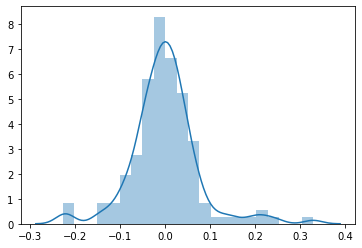

In [101]:
sns.distplot(rs)

# Making Predictions Using lr_model_15 Model

In [102]:
lst=['symboling','wheelbase','carwidth','carheight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','price']
df_test[lst] = scaler.transform(df_test[lst])

In [103]:
y_test = df_test.pop('price')
x_test = df_test

In [104]:
x_test_15=x_test[['horsepower','low_range','hatchback','mid_range','idi','dohcv']]
x_test_sm_15=sm.add_constant(x_test_15)

In [105]:
y_pred_15 = lr_model_15.predict(x_test_sm_15)

In [106]:
from sklearn.metrics import r2_score

r2=r2_score(y_true=y_test, y_pred=y_pred_15)
r2

0.4266369491716575

In [107]:
#lets add fwd_drive as it is highly corelated with price
x_16=X_train[['horsepower','hatchback','low_range','mid_range','idi','dohcv','fwd_drive']]

In [108]:
x_train_sm_16=sm.add_constant(x_16)
lr_16=sm.OLS(y_train,x_train_sm_16)
lr_model_16=lr_16.fit()
lr_model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     145.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.02e-59
Time:                        21:00:49   Log-Likelihood:                 170.46
No. Observations:                 143   AIC:                            -324.9
Df Residuals:                     135   BIC:                            -301.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2642      0.030      8.798      0.000       0.205       0.324
horsepower     0.7275      0.059     12.405      0.000       0.611       0.843
hatchback     -0.0322      0.014     -2.233      0.027      -0.061      -0.004
low_range     -0.2278      0.023     -9.857      0.000      -0.274      -0.182
mid_range     -0.2045      0.021     -9.665      0.000      -0.246      -0.163
idi            0.1192      0.024      4.877      0.000       0.071       0.168
dohcv         -0.2334      0.084     -2.763      0.007      -0.400      -0.066
fwd_drive     -0.0508      0.018     -2.804      0.006      -0.087      -0.015
==============================================================================
Omnibus:                       30.214   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.749
Skew:                           0.647   Prob(JB):                     9.93e-27
Kurtosis:                       7.292   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
vif = pd.DataFrame()
vif['Features'] = x_16.columns
vif['VIF'] = [variance_inflation_factor(x_16.values, i) for i in range(x_16.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,low_range,4.11
6,fwd_drive,3.95
3,mid_range,2.47
0,horsepower,1.79
1,hatchback,1.78
5,dohcv,1.18
4,idi,1.14


# Residual analysis

In [110]:
y_train_pred_16=lr_model_16.predict(x_train_sm_16)
rs=y_train-y_train_pred_16

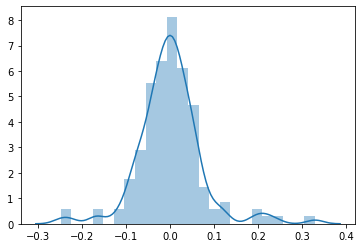

In [111]:
sns.distplot(rs)

# Making Predictions Using lr_model_16 Model


In [112]:
x_test_16=x_test[['horsepower','hatchback','low_range','mid_range','idi','dohcv','fwd_drive']]
x_test_sm_16=sm.add_constant(x_test_16)

In [113]:
y_pred_16 = lr_model_16.predict(x_test_sm_16)

In [114]:
r2=r2_score(y_true=y_test, y_pred=y_pred_16)
r2

0.7555515310112217

In [115]:
#it is giving good R2 score ,lets check in Q-Q plot

Text(0, 0.5, 'y_pred_16')

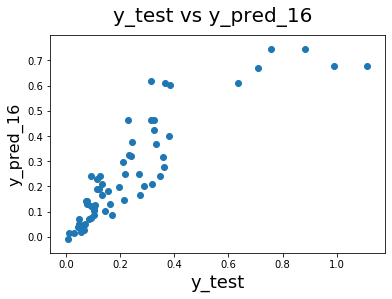

In [116]:
fig = plt.figure()
plt.scatter(y_test, y_pred_16)
fig.suptitle('y_test vs y_pred_16', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_16', fontsize = 16) 

In [117]:
#replacing horsepower with cylindernumber,(cylindernumber is highly corelated with horse power, we can not add both)

In [118]:
x_17=X_train[['cylindernumber','hatchback','low_range','mid_range','idi','dohcv','fwd_drive']]

In [119]:
x_train_sm_17=sm.add_constant(x_17)
lr_17=sm.OLS(y_train,x_train_sm_17)
lr_model_17=lr_17.fit()
lr_model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     87.58
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.70e-47
Time:                        21:00:51   Log-Likelihood:                 139.37
No. Observations:                 143   AIC:                            -262.7
Df Residuals:                     135   BIC:                            -239.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3520      0.037      9.410      0.000       0.278       0.426
cylindernumber     0.6163      0.085      7.213      0.000       0.447       0.785
hatchback         -0.0066      0.018     -0.369      0.713      -0.042       0.029
low_range         -0.2638      0.028     -9.266      0.000      -0.320      -0.207
mid_range         -0.2133      0.027     -7.837      0.000      -0.267      -0.159
idi                0.0437      0.029      1.509      0.134      -0.014       0.101
dohcv              0.0109      0.099      0.110      0.913      -0.186       0.208
fwd_drive         -0.1347      0.020     -6.709      0.000      -0.174      -0.095
==============================================================================
Omnibus:                       29.141   Durbin-Watson:                   2.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.467
Skew:                           0.863   Prob(JB):                     2.73e-14
Kurtosis:                       5.739   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
vif = pd.DataFrame()
vif['Features'] = x_17.columns
vif['VIF'] = [variance_inflation_factor(x_17.values, i) for i in range(x_17.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,low_range,4.14
6,fwd_drive,3.98
3,mid_range,2.38
0,cylindernumber,2.21
1,hatchback,1.76
4,idi,1.18
5,dohcv,1.11


In [121]:
#replacing hatchback with wheel base
x_17=X_train[['cylindernumber','wheelbase','low_range','mid_range','idi','dohcv','fwd_drive']]

In [122]:
x_train_sm_17=sm.add_constant(x_17)
lr_17=sm.OLS(y_train,x_train_sm_17)
lr_model_17=lr_17.fit()
lr_model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     93.55
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.23e-48
Time:                        21:00:52   Log-Likelihood:                 143.26
No. Observations:                 143   AIC:                            -270.5
Df Residuals:                     135   BIC:                            -246.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2722      0.046      5.965      0.000       0.182       0.362
cylindernumber     0.5908      0.083      7.092      0.000       0.426       0.756
wheelbase          0.1419      0.051      2.772      0.006       0.041       0.243
low_range         -0.2430      0.028     -8.610      0.000      -0.299      -0.187
mid_range         -0.1951      0.027     -7.160      0.000      -0.249      -0.141
idi                0.0162      0.030      0.543      0.588      -0.043       0.075
dohcv              0.0416      0.096      0.433      0.666      -0.148       0.232
fwd_drive         -0.1166      0.020     -5.697      0.000      -0.157      -0.076
==============================================================================
Omnibus:                       35.981   Durbin-Watson:                   2.357
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.900
Skew:                           0.989   Prob(JB):                     6.71e-21
Kurtosis:                       6.418   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
vif = pd.DataFrame()
vif['Features'] = x_17.columns
vif['VIF'] = [variance_inflation_factor(x_17.values, i) for i in range(x_17.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,wheelbase,5.89
0,cylindernumber,5.47
6,fwd_drive,4.03
2,low_range,3.62
3,mid_range,2.38
4,idi,1.38
5,dohcv,1.10


In [124]:
#removing dohcv
x_17=X_train[['cylindernumber','wheelbase','low_range','mid_range','idi','fwd_drive']]

In [125]:
x_train_sm_17=sm.add_constant(x_17)
lr_17=sm.OLS(y_train,x_train_sm_17)
lr_model_17=lr_17.fit()
lr_model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     109.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.24e-49
Time:                        21:00:52   Log-Likelihood:                 143.16
No. Observations:                 143   AIC:                            -272.3
Df Residuals:                     136   BIC:                            -251.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2729      0.045      6.001      0.000       0.183       0.363
cylindernumber     0.5984      0.081      7.371      0.000       0.438       0.759
wheelbase          0.1388      0.051      2.747      0.007       0.039       0.239
low_range         -0.2438      0.028     -8.683      0.000      -0.299      -0.188
mid_range         -0.1957      0.027     -7.217      0.000      -0.249      -0.142
idi                0.0164      0.030      0.552      0.582      -0.042       0.075
fwd_drive         -0.1172      0.020     -5.749      0.000      -0.157      -0.077
==============================================================================
Omnibus:                       34.590   Durbin-Watson:                   2.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.350
Skew:                           0.957   Prob(JB):                     1.08e-19
Kurtosis:                       6.316   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
#removing idi
x_17=X_train[['cylindernumber','wheelbase','low_range','mid_range','fwd_drive']]

In [127]:
x_train_sm_17=sm.add_constant(x_17)
lr_17=sm.OLS(y_train,x_train_sm_17)
lr_model_17=lr_17.fit()
lr_model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     132.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.19e-50
Time:                        21:00:53   Log-Likelihood:                 143.00
No. Observations:                 143   AIC:                            -274.0
Df Residuals:                     137   BIC:                            -256.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2712      0.045      5.992      0.000       0.182       0.361
cylindernumber     0.5932      0.080      7.375      0.000       0.434       0.752
wheelbase          0.1486      0.047      3.147      0.002       0.055       0.242
low_range         -0.2434      0.028     -8.695      0.000      -0.299      -0.188
mid_range         -0.1939      0.027     -7.222      0.000      -0.247      -0.141
fwd_drive         -0.1177      0.020     -5.796      0.000      -0.158      -0.078
==============================================================================
Omnibus:                       33.134   Durbin-Watson:                   2.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.542
Skew:                           0.920   Prob(JB):                     1.19e-18
Kurtosis:                       6.236   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
vif = pd.DataFrame()
vif['Features'] = x_17.columns
vif['VIF'] = [variance_inflation_factor(x_17.values, i) for i in range(x_17.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,wheelbase,4.86
0,cylindernumber,4.82
4,fwd_drive,3.99
2,low_range,3.61
3,mid_range,2.35


In [129]:
#[['enginesize','mid_range','idi','dohcv','fwd_drive']]

# Residual analysis

In [130]:
y_train_pred_17=lr_model_17.predict(x_train_sm_17)
rs=y_train-y_train_pred_17

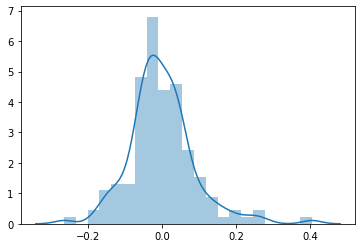

In [131]:
sns.distplot(rs)

# Making Predictions Using lr_model_17 Model

In [132]:
x_test_17=x_test[['cylindernumber','wheelbase','low_range','mid_range','fwd_drive']]
x_test_sm_17=sm.add_constant(x_test_17)

In [135]:
y_pred_17 = lr_model_17.predict(x_test_sm_17)

In [136]:
r2=r2_score(y_true=y_test, y_pred=y_pred_17)
r2

0.7499607420898976

Text(0, 0.5, 'y_pred_17')

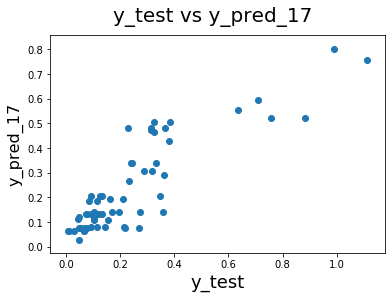

In [137]:
fig = plt.figure()
plt.scatter(y_test, y_pred_17)
fig.suptitle('y_test vs y_pred_17', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_17', fontsize = 16) 

In [138]:
#replacing cylindernumber with enginesize
x_18=X_train[['enginesize','wheelbase','low_range','mid_range','fwd_drive']]

In [139]:
x_train_sm_18=sm.add_constant(x_18)
lr_18=sm.OLS(y_train,x_train_sm_18)
lr_model_18=lr_18.fit()
lr_model_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     202.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.82e-61
Time:                        21:01:50   Log-Likelihood:                 169.08
No. Observations:                 143   AIC:                            -326.2
Df Residuals:                     137   BIC:                            -308.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2428      0.036      6.814      0.000       0.172       0.313
enginesize     0.7150      0.061     11.775      0.000       0.595       0.835
wheelbase      0.0309      0.041      0.754      0.452      -0.050       0.112
low_range     -0.2177      0.023     -9.335      0.000      -0.264      -0.172
mid_range     -0.1756      0.022     -7.979      0.000      -0.219      -0.132
fwd_drive     -0.0735      0.018     -4.182      0.000      -0.108      -0.039
==============================================================================
Omnibus:                       31.231   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.166
Skew:                           0.791   Prob(JB):                     5.88e-21
Kurtosis:                       6.624   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
#remving wheelbase
x_18=X_train[['enginesize','low_range','mid_range','fwd_drive']]

In [141]:
x_train_sm_18=sm.add_constant(x_18)
lr_18=sm.OLS(y_train,x_train_sm_18)
lr_model_18=lr_18.fit()
lr_model_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.42e-62
Time:                        21:02:04   Log-Likelihood:                 168.79
No. Observations:                 143   AIC:                            -327.6
Df Residuals:                     138   BIC:                            -312.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2568      0.030      8.451      0.000       0.197       0.317
enginesize     0.7282      0.058     12.545      0.000       0.613       0.843
low_range     -0.2213      0.023     -9.711      0.000      -0.266      -0.176
mid_range     -0.1777      0.022     -8.154      0.000      -0.221      -0.135
fwd_drive     -0.0767      0.017     -4.497      0.000      -0.110      -0.043
==============================================================================
Omnibus:                       29.362   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.642
Skew:                           0.754   Prob(JB):                     6.88e-19
Kurtosis:                       6.430   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
#lets try adding rotor
x_18=X_train[['enginesize','low_range','mid_range','fwd_drive','rotor']]

In [143]:
x_train_sm_18=sm.add_constant(x_18)
lr_18=sm.OLS(y_train,x_train_sm_18)
lr_model_18=lr_18.fit()
lr_model_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     222.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.75e-64
Time:                        21:02:15   Log-Likelihood:                 174.94
No. Observations:                 143   AIC:                            -337.9
Df Residuals:                     137   BIC:                            -320.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2143      0.032      6.777      0.000       0.152       0.277
enginesize     0.8144      0.061     13.358      0.000       0.694       0.935
low_range     -0.2168      0.022     -9.876      0.000      -0.260      -0.173
mid_range     -0.1827      0.021     -8.697      0.000      -0.224      -0.141
fwd_drive     -0.0506      0.018     -2.808      0.006      -0.086      -0.015
rotor          0.1513      0.043      3.510      0.001       0.066       0.237
==============================================================================
Omnibus:                       32.457   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.747
Skew:                           0.792   Prob(JB):                     1.09e-23
Kurtosis:                       6.904   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
vif = pd.DataFrame()
vif['Features'] = x_18.columns
vif['VIF'] = [variance_inflation_factor(x_18.values, i) for i in range(x_18.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,fwd_drive,4.18
1,low_range,3.67
2,mid_range,2.53
0,enginesize,1.62
4,rotor,1.20


# Residual analysis

In [145]:
y_train_pred_18=lr_model_18.predict(x_train_sm_18)
rs=y_train-y_train_pred_18

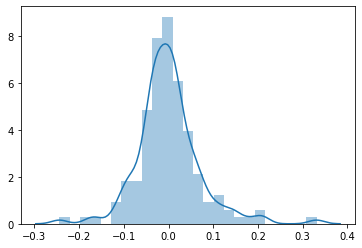

In [146]:
sns.distplot(rs)

# Making Predictions Using lr_model_18 Model

In [147]:
x_test_18=x_test[['enginesize','low_range','mid_range','fwd_drive','rotor']]
x_test_sm_18=sm.add_constant(x_test_18)

In [148]:
y_pred_18 = lr_model_18.predict(x_test_sm_18)

In [149]:
r2=r2_score(y_true=y_test, y_pred=y_pred_18)
r2

0.8624808418903005

Text(0, 0.5, 'y_pred_18')

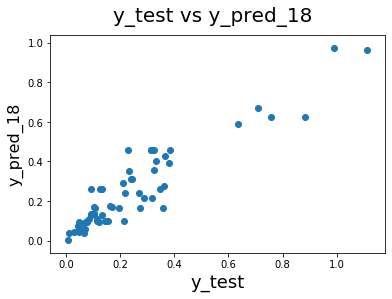

In [150]:
fig = plt.figure()
plt.scatter(y_test, y_pred_18)
fig.suptitle('y_test vs y_pred_18', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_18', fontsize = 16) 